<a href="https://colab.research.google.com/github/heros-lab/colaboratory/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

work_path = "/content/drive/My Drive/Colab Notebooks"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [25]:
data1_x = np.load(f"{work_path}/learn/ms1a_x.npy")
data1_y = np.load(f"{work_path}/learn/ms1a_y.npy")
data2_x = np.load(f"{work_path}/learn/ms2a_x.npy")
data2_y = np.load(f"{work_path}/learn/ms2a_y.npy")

In [50]:
df_state1 = pd.DataFrame(data1_x)
df_state2 = pd.DataFrame(data2_x)
df_output1 = pd.DataFrame(data1_y)
df_output2 = pd.DataFrame(data2_y)

state_columns  = ["x1[k]","x2[k]","x3[k]","x4[k]","d/dt x3[k]","d/dt x4[k]","u[k]"]
df_state1.columns = state_columns
df_state2.columns = state_columns

output_columns  = ["x1[k+1]","x2[k+1]","x3[k+1]","x4[k+1]"]
df_output1.columns = output_columns
df_output2.columns = output_columns

sim1_times = np.arange(0,20,0.001)
df_state1.index = sim1_times
df_output1.index = sim1_times

sim2_times = np.arange(0,10,0.001)
df_state2.index = sim2_times
df_output2.index = sim2_times

In [84]:
df_ms1 = df_output1.join(state1)
df_ms2 = df_output2.join(state2)

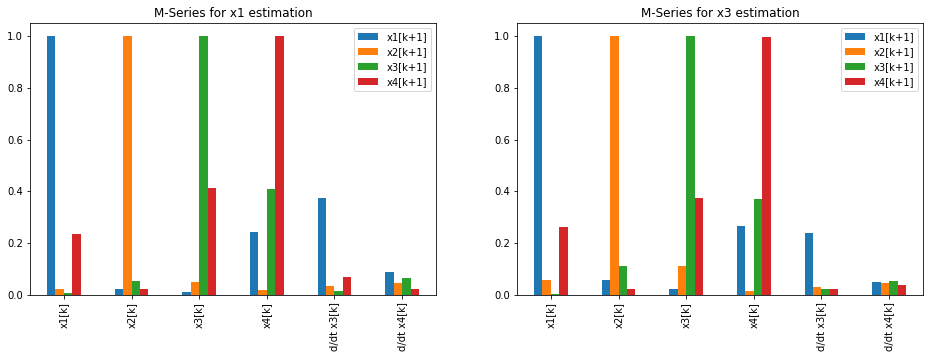

In [91]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
df_ms1.corr().abs()[output_columns][4:-1].plot.bar(title="M-Series for x1 estimation", ax=ax[0])
df_ms2.corr().abs()[output_columns][4:-1].plot.bar(title="M-Series for x3 estimation", ax=ax[1])
